We use a pre-processed sample from the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) to predict the house prices based on the number of rooms.
* RM: average number of rooms per dwelling  $\leftarrow$ **Input** $x$
* MEDV: Median value of owner-occupied homes in $\$$1000’s $\leftarrow$ **Target** $y$

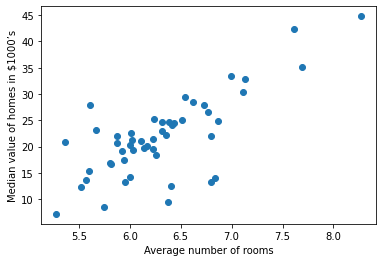

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('sample_boston.csv')
x = df['RM'].values
y = df['MEDV'].values 
plt.scatter(x, y);
plt.xlabel("Average number of rooms");
plt.ylabel("Median value of homes in $1000’s");

In [4]:
def cost(x, y, w, b, n):
    J = 1/(2*n) * np.sum((y - (w*x + b))**2)
    return J

def weight_update(x, y, w, b, alpha, n):
    y_prediction = w*x + b
    w = w + alpha * 1/n * np.dot(y - y_prediction, x)
    b = b + alpha * 1/n * np.sum(y - y_prediction)
    return w, b
    
def plot_regression_line(x, y, w, b, i=None):
    # Plot the points
    plt.scatter(x, y)
    
    # Plot the regression line
    x_values = np.linspace(x.min(), x.max(), 100)
    y_prediction = w*x_values + b
    legend = "Iteration" + str(i)
    plt.plot(x_values, y_prediction, label=legend);
    plt.xlabel("Average number of rooms");
    plt.ylabel("Median value of homes in $1000’s");
    plt.title("Fitting a linear regression model");
    if i:
        plt.legend();
    
def plot_cost_function(J):
    plt.figure(figsize=(8, 4))
    plt.plot(J, label="Cost function");
    plt.xlabel("Iterations for the weight update");
    plt.title("Decline in the cost function");
    plt.legend();
    
    
def iterations(x, y, w, b, alpha, n, m=5):
    print("Initial Slope:", w)
    print("Intial Intercept:", b)
    print("Initial Cost:", cost(x, y, w, b, n))
    plt.figure(figsize=(12, 6))
    plot_regression_line(x, y, w, b, i=0)
    J = np.zeros(m)
    for i in range(m):
        w, b = weight_update(x, y, w, b, alpha, n)
        J[i] = cost(x, y, w, b, n)
        print("\nAfter {} iteration(s)".format(i+1))
        print("Updated Slope :", w)
        print("Updated Intercept:", b)
        print("Cost:", J[i])
        plot_regression_line(x, y, w, b, i+1)
    plot_cost_function(J)
    

Illustration of weight update iterations using gradient descent for the linear regression model
Initial Slope: 16
Intial Intercept: -37
Initial Cost: 903.18625632

After 1 iteration(s)
Updated Slope : 13.3280130696
Updated Intercept: -37.4201712
Cost: 321.9273775565587

After 2 iteration(s)
Updated Slope : 11.754228985806694
Updated Intercept: -37.6676633616801
Cost: 120.28007647123901

After 3 iteration(s)
Updated Slope : 10.827280587756901
Updated Intercept: -37.81344847915116
Cost: 50.32564558312046

After 4 iteration(s)
Updated Slope : 10.281314997720925
Updated Intercept: -37.899328682715606
Cost: 26.057418911579635

After 5 iteration(s)
Updated Slope : 9.959746272534458
Updated Intercept: -37.949925206702744
Cost: 17.638412114998143


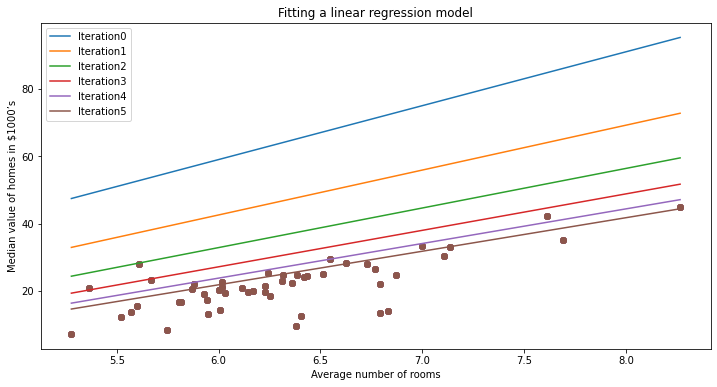

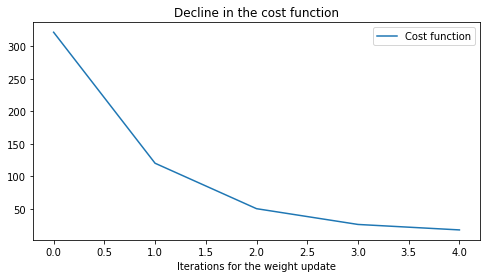

In [5]:
n = len(y) # Number of training examples
alpha = 0.01 # Learning rate
w = 16 #10 # Slope
b = -37 #-60 # Intercept
print("Illustration of weight update iterations using gradient descent for the linear regression model")
iterations(x, y, w, b, alpha, n, 5)